In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Normalization
from tensorflow.keras.preprocessing import image, image_dataset_from_directory

In [2]:
train_ds= image_dataset_from_directory('dataset/Training', subset='training', seed = 12,
                                       validation_split = 0.1, batch_size=32,
                                       image_size = (128,128))

Found 1485 files belonging to 17 classes.
Using 1337 files for training.


In [3]:
val_ds= image_dataset_from_directory('dataset/Training', subset='validation', seed = 12,
                                       validation_split = 0.1, batch_size=32,
                                       image_size = (128,128))

Found 1485 files belonging to 17 classes.
Using 148 files for validation.


In [4]:
test_ds= image_dataset_from_directory('dataset/Testing', seed = 12,
                                       batch_size=32,
                                       image_size = (128,128))

Found 397 files belonging to 17 classes.


In [5]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

In [6]:
vgg16_net= VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
vgg16_net.trainable = False

In [7]:
model = Sequential()
model.add(Normalization(input_shape=(128,128,3)))
model.add(vgg16_net)
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(17, activation='softmax'))


c:\Python311\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 128, 128, 3)    │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 17)             │         8,721 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,180,888 (73.17 MB)

 Trainable params: 4,466,193 (17.04 MB)

 Non-trainable params: 14,714,695 (56.13 MB)

In [17]:
history = model.fit(train_ds, validation_data=val_ds, epochs=20) 

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.7911 - loss: 1.1755 - val_accuracy: 0.9058 - val_loss: 0.6154
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7965 - loss: 1.3259 - val_accuracy: 0.8930 - val_loss: 0.5151
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8049 - loss: 1.4029 - val_accuracy: 0.8856 - val_loss: 0.5828
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.7808 - loss: 1.4163 - val_accuracy: 0.8968 - val_loss: 0.4756
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7973 - loss: 1.2812 - val_accuracy: 0.8923 - val_loss: 0.5747
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.8064 - loss: 1.2402 - val_accuracy: 0.9155 - val_loss: 0.3543
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8053 - loss: 1.1123 - val_accuracy: 0.9020 - val_loss: 0.4882
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8129 - loss: 1.0929 - val_accuracy: 0.9170 - val_loss:

In [18]:
model.evaluate(test_ds)[1]

42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 820ms/step - accuracy: 0.9344 - loss: 0.2781


0.92819744348526

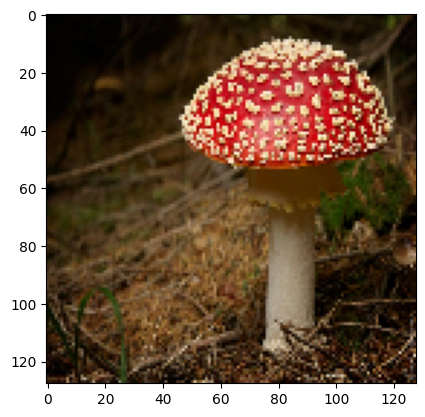

In [25]:
im1 = image.load_img('14.jpg', target_size=(128,128))
plt.imshow(im1)

In [26]:
im1 = image.img_to_array(im1)
im1 = np.expand_dims(im1, axis = 0)
pr = model.predict(im1)
pr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [27]:
prob = tf.nn.softmax(pr)
predict = np.argmax(prob , axis = 1)
predict

array([4], dtype=int64)